In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/Users/riadanas/Desktop/housing regression MLE/data/raw/train.csv')

pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows

## Data Exploration / Cleaning

In [3]:
print(df.shape)
df.head(2)

(734668, 39)


,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Alpharetta
1,2012-03-31,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,2012,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh


In [4]:
df.describe(include='all')

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full
count,734668,7.346680e+05,7.346680e+05,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,7.346680e+05,734668.000000,734668.000000,734668.000000,734668.000000,734668.000000,7.346680e+05,734668
unique,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
top,2012-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New York-Newark-Jersey City
freq,6226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97940
mean,NaN,3.627279e+05,3.934349e+05,206.304898,214.989539,78.080753,83.615413,95.030886,82.146315,65.603008,0.974760,0.240985,0.278791,NaN,48717.657886,2016.576271,11.744656,0.604960,3.685094,1.220483,46.673265,56.423263,48.750689,5.680688,8.788137,21618.045101,36.575222,33598.525843,21271.596441,8628.065948,1097.994659,2.972027e+05,11335.389564,861.397693,20808.177737,20808.177737,9692.041112,3.614912e+05,NaN
std,NaN,3.519235e+05,2.067030e+06,755.238657,297.784145,77.775875,87.110001,93.774352,92.198812,86.423702,0.062912,0.188203,0.229898,NaN,32367.298308,2.835631,28.381966,1.503608,7.847417,2.655551,74.679607,175.065964,62.764955,16.709396,17.181169,19638.932704,12.379016,20311.644110,19397.446795,7512.562709,511.753906,2.495549e+05,10322.622721,987.900111,18843.549574,18843.549574,8849.531194,3.171001e+05,NaN
min,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1431.000000,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.046432e+04,NaN
25%,NaN,1.714000e+05,1.844500e+05,103.459459,109.682881,19.000000,17.000000,24.000000,22.000000,28.000000,0.962765,0.111111,0.054348,NaN,19038.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1.000000,7.000000,0.000000,1.000000,4474.000000,33.900000,22480.000000,4355.000000,1920.000000,831.000000,1.366000e+05,2299.000000,133.000000,4323.000000,4323.000000,1946.000000,1.773918e+05,NaN
50%,NaN,2.777500e+05,2.950000e+05,151.386827,159.066808,56.000000,58.000000,69.000000,54.000000,48.500000,0.979552,0.203593,0.263889,NaN,48029.000000,2017.000000,3.000000,0.000000,1.000000,0.000000,22.000000,10.000000,27.000000,0.000000,4.000000,17670.000000,38.400000,30658.000000,17326.000000,7346.000000,1074.000000,2.369000e+05,9175.000000,557.000000,17074.000000,17074.000000,7829.500000,2.813007e+05,NaN
75%,NaN,4.395000e+05,4.650000e+05,238.071467,248.713551,113.000000,123.000000,137.000000,110.000000,80.000000,0.994368,0.333333,0.437908,NaN,78659.000000,2019.000000,12.000000,1.000000,4.000000,1.000000,60.000000,42.000000,66.000000,4.000000,10.000000,33235.000000,43.000000,42072.000000,32686.000000,13444.000000,1379.000000,3.895000e+05,17521.000000,1241.000000,31982.000000,31982.000000,15011.000000,4.421840e+05,NaN


Things to consider:
- use Polars instead of Pandas (faster)
- How to best encode cities since there are multiple categories?
- is there any multicolinearity? is multicolinearity important in Regression problems?

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 734668 entries, 0 to 734667
Data columns (total 39 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   date                          734668 non-null  object 
 1   median_sale_price             734668 non-null  float64
 2   median_list_price             734668 non-null  float64
 3   median_ppsf                   734668 non-null  float64
 4   median_list_ppsf              734668 non-null  float64
 5   homes_sold                    734668 non-null  float64
 6   pending_sales                 734668 non-null  float64
 7   new_listings                  734668 non-null  float64
 8   inventory                     734668 non-null  float64
 9   median_dom                    734668 non-null  float64
 10  avg_sale_to_list              734668 non-null  float64
 11  sold_above_list               734668 non-null  float64
 12  off_market_in_two_weeks       734668 non-nul

In [6]:
df['city'].value_counts()

city
NY     97940
CHI    44368
LA     42480
PHL    39412
DC     37052
PGH    34928
BOS    32096
DAL    29618
HOU    25842
MSP    25606
DET    25134
STL    24898
ATL    23954
MIA    21358
SF     19588
SEA    18408
PHX    17582
CIN    17582
BWI    17346
RIV    17228
TPA    15222
DEN    14750
PDX    13924
SAC    13452
CLT    12390
SA     12272
SD     11210
ORL    10738
ATX    10148
LV      8142
Name: count, dtype: int64

In [7]:
df['city_full'].value_counts().head(2)

city_full
New York-Newark-Jersey City    97940
Chicago-Naperville-Elgin       44368
Name: count, dtype: int64

In [8]:
df['city_full'].unique()

array(['Atlanta-Sandy Springs-Alpharetta', 'Pittsburgh',
       'Boston-Cambridge-Newton', 'Tampa-St. Petersburg-Clearwater',
       'Baltimore-Columbia-Towson', 'Portland-Vancouver-Hillsboro',
       'Philadelphia-Camden-Wilmington', 'New York-Newark-Jersey City',
       'Chicago-Naperville-Elgin', 'Orlando-Kissimmee-Sanford',
       'Seattle-Tacoma-Bellevue', 'San Francisco-Oakland-Berkeley',
       'San Diego-Chula Vista-Carlsbad', 'Austin-Round Rock-Georgetown',
       'St. Louis', 'Sacramento-Roseville-Folsom',
       'Phoenix-Mesa-Chandler', 'Riverside-San Bernardino-Ontario',
       'San Antonio-New Braunfels', 'Detroit-Warren-Dearborn',
       'Cincinnati', 'Houston-The Woodlands-Sugar Land',
       'Charlotte-Concord-Gastonia', 'Denver-Aurora-Lakewood',
       'Los Angeles-Long Beach-Anaheim', 'DC_Metro',
       'Dallas-Fort Worth-Arlington', 'Minneapolis-St. Paul-Bloomington',
       'Las Vegas-Henderson-Paradise',
       'Miami-Fort Lauderdale-Pompano Beach'], dtype=object)

### Map cities to Lat/Long
- The goal is to use Lattitude and longitude instead of cities for our ML models

In [9]:
# Load the metros USA dataset to get lattitude and longitude
metros = pd.read_csv("/Users/riadanas/Desktop/housing regression MLE/data/raw/usmetros.csv")

metros.head(2)

,metro_fips,metro,metro_ascii,metro_full,county_name,county_fips,state_id,state_name,lat,lng,population
0,35620,New York,New York,New York-Newark-Jersey City,Suffolk,36103,NY,New York,40.7222,-74.0225,19498249
1,31080,Los Angeles,Los Angeles,Los Angeles-Long Beach-Anaheim,Los Angeles,6037,CA,California,34.2215,-118.1494,12799100


In [10]:
# Mapping dictionary for mismatched names
city_mapping = {
    'Las Vegas-Henderson-Paradise': 'Las Vegas-Henderson-North Las Vegas',
    'Denver-Aurora-Lakewood': 'Denver-Aurora-Centennial',
    'Houston-The Woodlands-Sugar Land': 'Houston-Pasadena-The Woodlands',
    'Austin-Round Rock-Georgetown': 'Austin-Round Rock-San Marcos',
    'Miami-Fort Lauderdale-Pompano Beach': 'Miami-Fort Lauderdale-West Palm Beach',
    'San Francisco-Oakland-Berkeley': 'San Francisco-Oakland-Fremont',
    'DC_Metro': 'Washington-Arlington-Alexandria',
    'Atlanta-Sandy Springs-Alpharetta': 'Atlanta-Sandy Springs-Roswell'
}

# Apply mapping before merging
df['city_full'] = df['city_full'].replace(city_mapping)

In [11]:
# Apply mapping before merging
df['city_full'] = df['city_full'].replace(city_mapping)

# Re-run the merge
df = df.merge(
    metros[['metro_full', 'lat', 'lng']], 
    how="left", 
    left_on="city_full", 
    right_on="metro_full"
)

# Drop duplicate column
df.drop(columns=["metro_full"], inplace=True)

# Check again for missing matches
missing = df[df['lat'].isnull()]['city_full'].unique()
print("Still missing:", missing)

Still missing: []


In [12]:
print(df.shape)
df.head(2)

(734668, 41)


,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
0,2012-03-31,46550.0,217450.0,31.813674,110.183666,14.0,23.0,44.0,64.0,59.5,0.943662,0.142857,0.043478,ATL,30002,2012,12.0,2.0,4.0,1.0,60.0,45.0,57.0,4.0,7.0,5811.0,36.3,33052.0,5811.0,2677.0,710.0,279500.0,3171.0,460.0,5408.0,5408.0,2492.0,200773.999557,Atlanta-Sandy Springs-Roswell,33.7338,-84.3922
1,2012-03-31,200000.0,7500.0,104.931794,79.265873,1.0,1.0,1.0,2.0,290.0,0.909091,0.000000,0.000000,PGH,15469,2012,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,2441.0,41.8,20241.0,2385.0,1108.0,641.0,94600.0,1171.0,52.0,2376.0,2376.0,1018.0,105863.681174,Pittsburgh,40.4744,-79.8632


In [13]:
df.tail(2)

,date,median_sale_price,median_list_price,median_ppsf,median_list_ppsf,homes_sold,pending_sales,new_listings,inventory,median_dom,avg_sale_to_list,sold_above_list,off_market_in_two_weeks,city,zipcode,year,bank,bus,hospital,mall,park,restaurant,school,station,supermarket,Total Population,Median Age,Per Capita Income,Total Families Below Poverty,Total Housing Units,Median Rent,Median Home Value,Total Labor Force,Unemployed Population,Total School Age Population,Total School Enrollment,Median Commute Time,price,city_full,lat,lng
734666,2021-12-31,135000.0,125000.0,109.855618,113.541667,57.0,79.0,102.0,77.0,54.0,0.942956,0.245614,0.405063,PHL,19142,2021,24.0,4.0,8.0,3.0,145.0,140.0,168.0,26.0,28.0,29864.0,31.8,15934.0,29779.0,11307.0,1041.0,83000.0,13926.0,2332.0,28671.0,28671.0,10964.0,115551.717114,Philadelphia-Camden-Wilmington,39.9056,-75.3020
734667,2021-12-31,267850.0,265000.0,134.974080,136.971154,526.0,499.0,437.0,88.0,10.0,1.012129,0.517110,0.697395,HOU,77449,2021,17.0,2.0,4.0,0.0,124.0,83.0,32.0,0.0,16.0,123157.0,32.9,28156.0,122630.0,38659.0,1512.0,174600.0,66730.0,3905.0,117864.0,117864.0,58491.0,245181.472984,Houston-Pasadena-The Woodlands,29.8422,-95.3855


In [ ]:
# df.to_csv('/Users/riadanas/Desktop/housing regression MLE/data/processed/cleaning.csv', index=False)

## Housing prices exploration

/var/folders/1h/14p077t95lbcy6x5tc6bqx3h0000gn/T/ipykernel_31737/1748330476.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


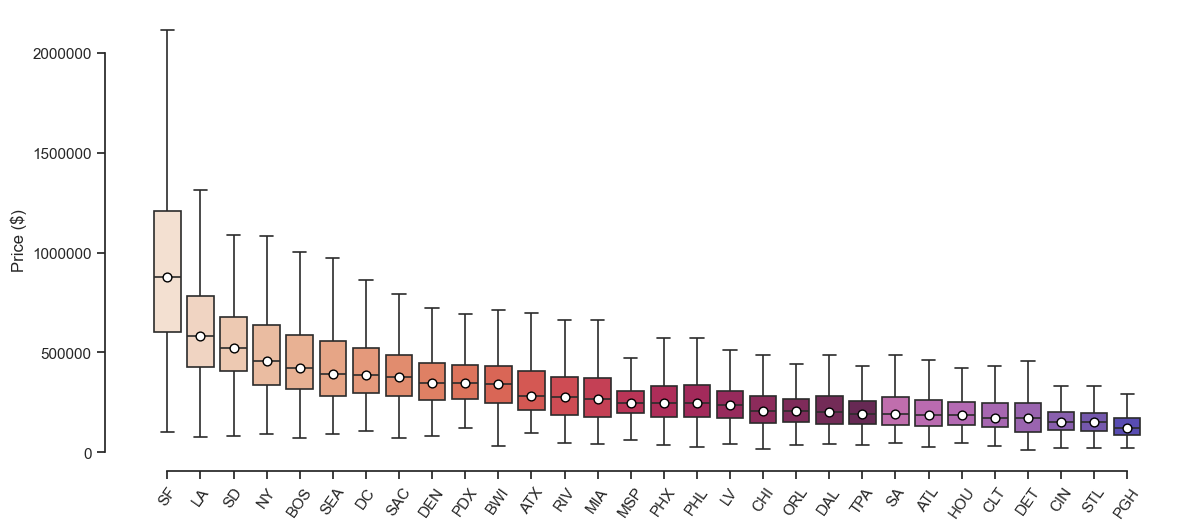

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import colorsys
sns.set_theme(style="whitegrid")           

# Boxplot of house prices for the cities, ordered by median price.

top_cities = df["city"].value_counts().head(30).index.tolist()
df_city    = df[df["city"].isin(top_cities)]
city_order = (
    df_city.groupby("city")["price"]
           .median()
           .sort_values(ascending=False)
           .index
)

base = sns.color_palette("rocket_r", len(city_order))

def lighten(color, amt=.4):
    h, l, s = colorsys.rgb_to_hls(*color)
    return colorsys.hls_to_rgb(h, min(1, l + amt*(1-l)), s)

palette = [
    lighten(c, .45) if i >= len(base) - 8 else c
    for i, c in enumerate(base)
]

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(14, 6))

sns.boxplot(
    x="city", y="price", data=df_city,
    order=city_order, palette=palette,
    showfliers=False, linewidth=1.2, ax=ax
)

medians = df_city.groupby("city")["price"].median().loc[city_order]
for tick, median in enumerate(medians):
    ax.scatter(tick, median, color="white", edgecolor="black", zorder=5, s=40)

ax.set_xlabel("")
ax.set_ylabel("Price ($)")
ax.tick_params(axis="x", rotation=55)
sns.despine(trim=True)
ax.grid(False)
ax.ticklabel_format(axis="y", style="plain")

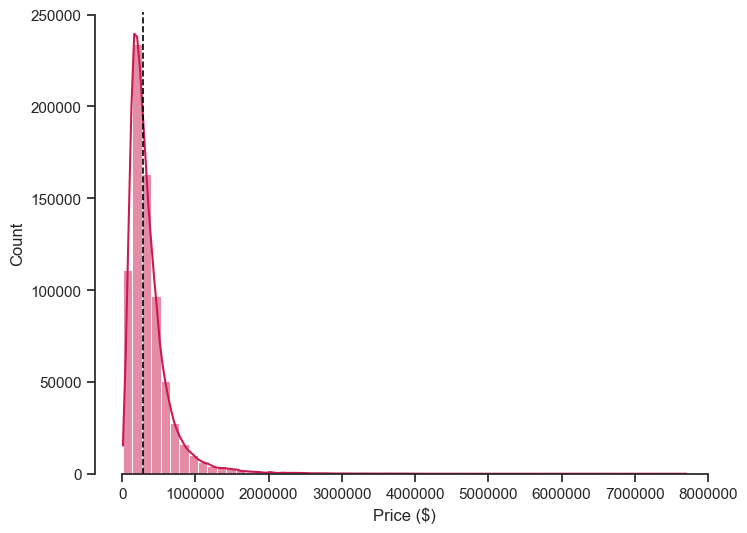

In [16]:
# Distribution of house prices across the dataset 

sns.set_theme(style="ticks")
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(df["price"].dropna(), bins=60, kde=True, color=sns.color_palette("rocket_r", 1)[0], ax=ax)
median_price = df["price"].median()
ax.axvline(median_price, ls="--", lw=1.2, color="black")
ax.set_xlabel("Price ($)")
ax.set_ylabel("Count")
sns.despine(trim=True)
ax.grid(False)
ax.ticklabel_format(axis="x", style="plain")
plt.show()